# Atividade Prática 5

>### Igor Martinelli           9006336

>### Zoltán Hirata Jetsmen     9293272

## Para a presente prática será escolhido o conjunto de dados wine, que é um conjunto de dados de classificação que ja fora utilizado nas práticas anteriores.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns

In [2]:
wine = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


>## Atividade 1 - Balanceamento de classes

In [3]:
wine.target.value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

>### Pela função acima, verificamos que o conjunto possui um desbalanceamento de classes, sendo a maior diferença entre as classes 1 e 2, igual a 23. Dessa forma, vamos utilizar técnicas de sub e superamostragem para realizar o balanceamento das classes.

In [4]:
df_aux_oversampling = pd.DataFrame()
for classes in wine.target.unique():
    df_wine_oversampling = wine[wine.target == classes].sample(n=65, replace=True)
    df_aux_oversampling = pd.concat([df_aux_oversampling, df_wine_oversampling], )
    
df_aux_oversampling.reset_index(drop=True, inplace=True)
df_aux_oversampling.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0
1,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0.0
2,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,0.0
3,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0.0
4,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0.0


In [5]:
df_aux_oversampling.target.value_counts()

2.0    65
1.0    65
0.0    65
Name: target, dtype: int64

In [6]:
df_aux_undersampling = pd.DataFrame()
for classes in wine.target.unique():
    df_wine_undersampling = wine[wine.target == classes].sample(n=48, replace=True)
    df_aux_undersampling = pd.concat([df_aux_undersampling, df_wine_undersampling], )
    
df_aux_undersampling.reset_index(drop=True, inplace=True)
df_aux_undersampling.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,0.0
1,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0,0.0
2,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0,0.0
3,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
4,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0,0.0


In [7]:
df_aux_undersampling.target.value_counts()

2.0    48
1.0    48
0.0    48
Name: target, dtype: int64

>### Desse modo, realizou-se uma subamostragem do conjunto, removendo-se alguns exemplos da classe 0 e 1, igualando a 48. Também foi feita uma superamostragem adicionando amostras às classes 2 e 0, tornando todas iguais a 65.

In [8]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def classificacao(data, columns, target, weights):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    weights:    Dicionário. Pesos das classes, cada chave do dicionário é a classe e seu valor a probabilidade
    ---------------------------------------------------------------
    Realiza a classificação em 3 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6, class_weight=weights)
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6, class_weight=weights)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1), class_weight=weights)
    
    clfs = [svm_l, svm_n, dt]
    clfs_names = ['svm_linear', 'svm_poly', 'dt']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

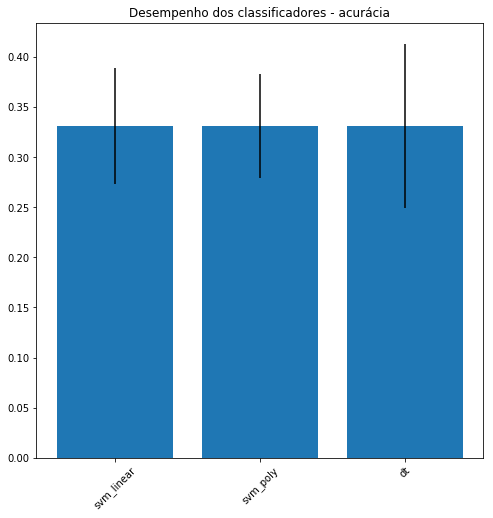

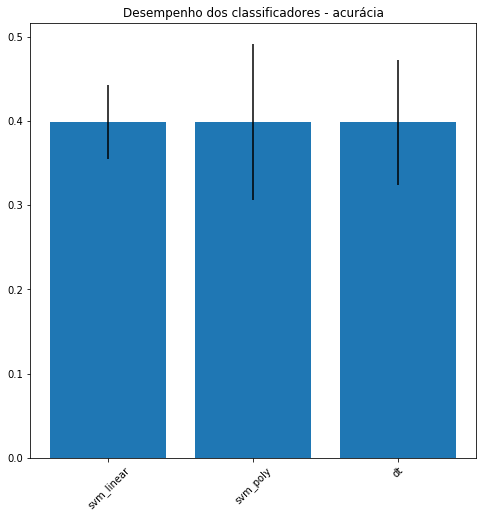

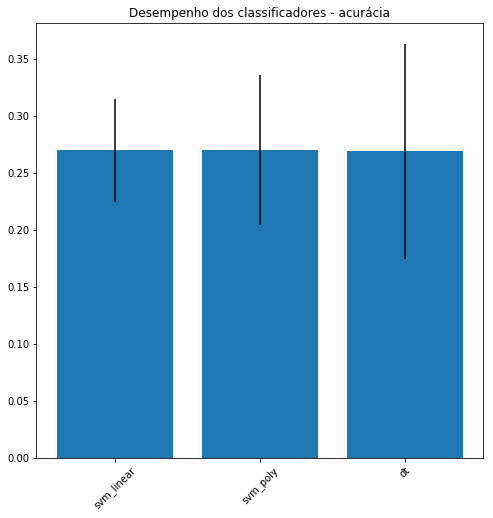

In [9]:
target = len(wine.columns) -1
columns = list(range(target))


# classe 0 com probabilidade 100%, classes 1 e 2 com probs 0%
clf = classificacao(wine, columns, target, weights={0:1, 1:0, 2:0})

# classe 1 com probabilidade 100%, classes 0 e 2 com probs 0%
clf = classificacao(wine, columns, target, weights={0:0, 1:1, 2:0})

# classe 2 com probabilidade 100%, classes 0 e 1 com probs 0%
clf = classificacao(wine, columns, target, weights={0:0, 1:0, 2:1})

>### Com os gráficos plotados acima, podemos ver que a taxa de acerto da rede bate exatamente com o esperado, pois, temos aproximadamente 33%, 40% e 27% de exemplos das classes 0, 1 e 2, sendo condizente com o resultado apresentado

>## Atividade 2 - Conversão de atributos

In [10]:
wine.target.unique()

array([0., 1., 2.])

In [11]:
wine = pd.get_dummies(wine, columns=['target'])
wine.iloc[:, -3:]

,target_0.0,target_1.0,target_2.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [29]:
test = wine.alcohol.copy()
testX = preprocessing.KBinsDiscretizer(n_bins=[2], encode='ordinal', strategy='quantile').fit(test.values.reshape(-1, 1))

In [30]:
testX.transform(test.values.reshape(-1, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [31]:
testX.get_params()

{'encode': 'ordinal', 'n_bins': [2], 'strategy': 'quantile'}

>### Para a conversão dos atributos, utilizou-se a coluna target, transformando as classes do tipo 0, 1 e 2 em variáveis do tipo dummies, sendo 0 representado por (1, 0, 0); 1 representado por (0, 1, 0) e 2 representado por (0, 0, 1). Além disso, utilizou-se a biblioteca preprocessing para codificar a variável alcohol por meio de uma discretização de valores. Para isso, foi utilizada a função KBinsDiscretizer, com 2 bins e com codificação do tipo ordinal e estratégia quantil. Isso significa que os valores da variável alcohol serão divididos em 2 bins sendo o intervalo de valores em cada bin definido pela quantidade de valores nessa variável, ou seja, se existirem 10 valores 14 e 10 valores 12, então o primeiro bin irá de (-inf, 12], [12, inf). Além disso, a codificação ordinal faz com que o retorno seja do tipo inteiro.

>## Atividade 3 - Normalização dos dados

In [4]:
df_normalize = wine.iloc[:, [1, 12]]
df_normalize.head()

,malic_acid,proline
0,1.71,1065.0
1,1.78,1050.0
2,2.36,1185.0
3,1.95,1480.0
4,2.59,735.0


>### Primeiramente, iremos realizar a abordagem de normalização 0-1.

In [5]:
norm_z_o = preprocessing.MinMaxScaler().fit_transform(df_normalize)
norm_z_o

array([[0.1916996 , 0.56134094],
       [0.2055336 , 0.55064194],
       [0.3201581 , 0.64693295],
       [0.23913043, 0.85734665],
       [0.36561265, 0.32596291],
       [0.20158103, 0.83594864],
       [0.22332016, 0.72182596],
       [0.27865613, 0.7253923 ],
       [0.17786561, 0.54707561],
       [0.12055336, 0.54707561],
       [0.28063241, 0.87874465],
       [0.14624506, 0.7146933 ],
       [0.19565217, 0.74322397],
       [0.19565217, 0.62196862],
       [0.22332016, 0.90513552],
       [0.21146245, 0.7360913 ],
       [0.23320158, 0.7146933 ],
       [0.16403162, 0.60770328],
       [0.16798419, 1.        ],
       [0.46640316, 0.40442225],
       [0.17588933, 0.35805991],
       [0.60474308, 0.35092725],
       [0.22134387, 0.53994294],
       [0.16996047, 0.5256776 ],
       [0.21146245, 0.40442225],
       [0.25889328, 0.39372325],
       [0.20355731, 0.65406562],
       [0.19367589, 0.71825963],
       [0.22924901, 0.45435093],
       [0.18577075, 0.53994294],
       [0.

>### Agora, vamos normalizar utilizando média 0 e variância 1

In [6]:
norm_m0_v1 = stats.zscore(df_normalize, axis=0, ddof=0)
norm_m0_v1

array([[-0.5622498 ,  1.01300893],
       [-0.49941338,  0.96524152],
       [ 0.02123125,  1.39514818],
       [-0.34681064,  2.33457383],
       [ 0.22769377, -0.03787401],
       [-0.51736664,  2.23903902],
       [-0.4186237 ,  1.72952002],
       [-0.16727801,  1.74544249],
       [-0.62508622,  0.94931905],
       [-0.88540853,  0.94931905],
       [-0.15830138,  2.43010864],
       [-0.76871232,  1.69767508],
       [-0.54429654,  1.82505483],
       [-0.54429654,  1.28369089],
       [-0.4186237 ,  2.54793491],
       [-0.47248348,  1.79320989],
       [-0.37374054,  1.69767508],
       [-0.68792264,  1.22000102],
       [-0.66996938,  2.97147258],
       [ 0.68550197,  0.3124203 ],
       [-0.63406285,  0.10542821],
       [ 1.31386618,  0.07358327],
       [-0.42760033,  0.91747411],
       [-0.66099274,  0.85378424],
       [-0.47248348,  0.3124203 ],
       [-0.25704433,  0.2646529 ],
       [-0.50839001,  1.42699311],
       [-0.55327317,  1.71359755],
       [-0.3916938 ,

>### Agora, vamos plotar os boxplots e histograma da variável não normalizada, normalizada por intervalo de 0 a 1 e por média 0 e variância 1, respectivamente.

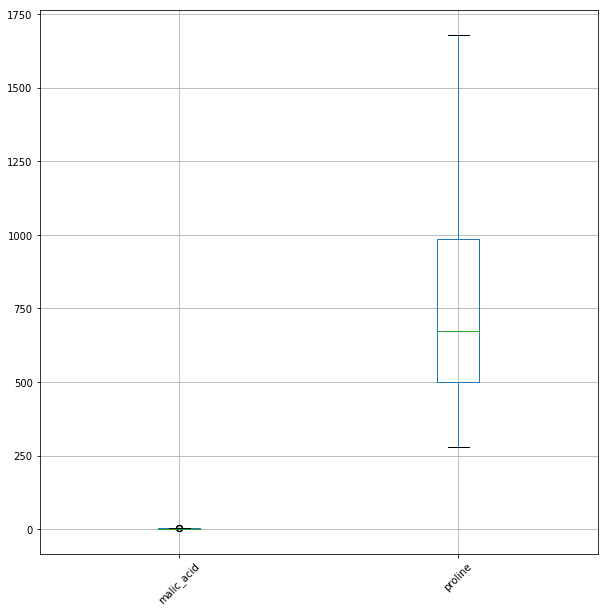

In [54]:
wine.boxplot(column=['malic_acid', 'proline'], rot=45, figsize=(10, 10))

<Figure size 432x288 with 0 Axes>

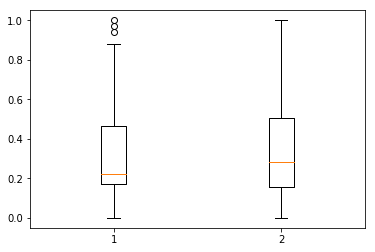

<Figure size 432x288 with 0 Axes>

In [68]:
plt.boxplot(norm_z_o)
plt.figure()

<Figure size 432x288 with 0 Axes>

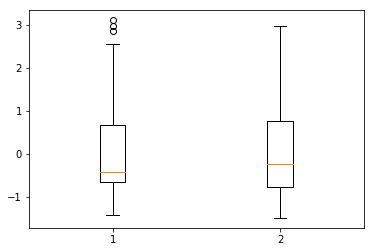

<Figure size 432x288 with 0 Axes>

In [69]:
plt.boxplot(norm_m0_v1)
plt.figure()

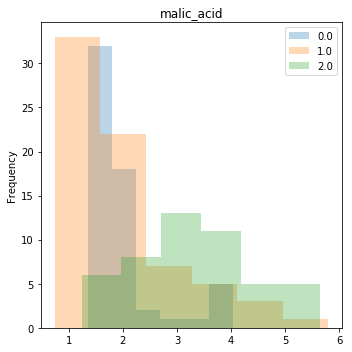

In [3]:
wine = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

columns = wine.columns.tolist()
plt.figure(figsize=(5, 5))
col = 4
plt.title(columns[col-3])
for c in wine.target.unique():
    wine.loc[wine.target == c, columns[col-3]].plot.hist(bins=6, alpha=0.3)
    
plt.legend(wine.target.unique())
plt.tight_layout()
plt.show()

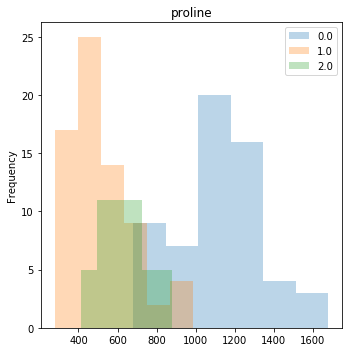

In [27]:
plt.figure(figsize=(5, 5))
col = 1
plt.title(columns[col-3])
for c in wine.target.unique():
    wine.loc[wine.target == c, columns[col-3]].plot.hist(bins=6, alpha=0.3)
    
plt.legend(wine.target.unique())
plt.tight_layout()
plt.show()

(array([18., 59., 33., 16., 13., 12., 14.,  7.,  3.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

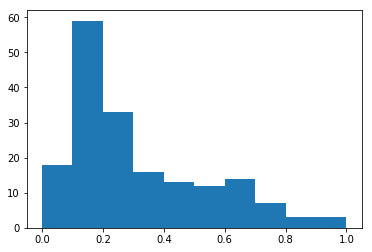

In [79]:
plt.hist(norm_z_o[:, 0])

(array([22., 37., 41., 19., 13., 19.,  8., 13.,  4.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

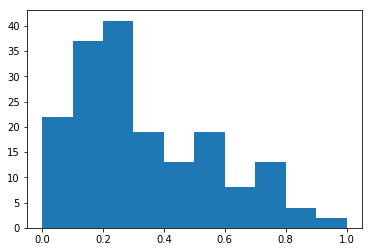

In [80]:
plt.hist(norm_z_o[:, 1])

(array([18., 59., 33., 16., 13., 12., 14.,  7.,  3.,  3.]),
 array([-1.43298305, -0.9787655 , -0.52454795, -0.07033039,  0.38388716,
         0.83810471,  1.29232226,  1.74653981,  2.20075736,  2.65497492,
         3.10919247]),
 <a list of 10 Patch objects>)

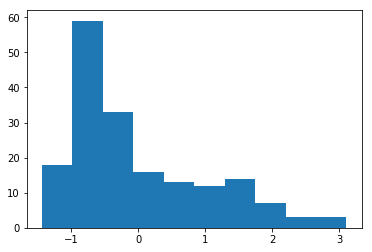

In [81]:
plt.hist(norm_m0_v1[:, 0])

(array([22., 37., 41., 19., 13., 19.,  8., 13.,  4.,  2.]),
 array([-1.49318765, -1.04672162, -0.6002556 , -0.15378958,  0.29267644,
         0.73914247,  1.18560849,  1.63207451,  2.07854053,  2.52500655,
         2.97147258]),
 <a list of 10 Patch objects>)

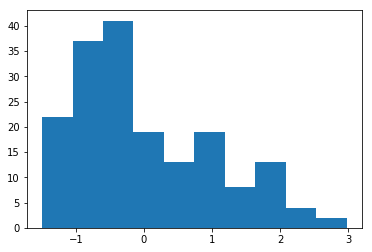

In [82]:
plt.hist(norm_m0_v1[:, 1])

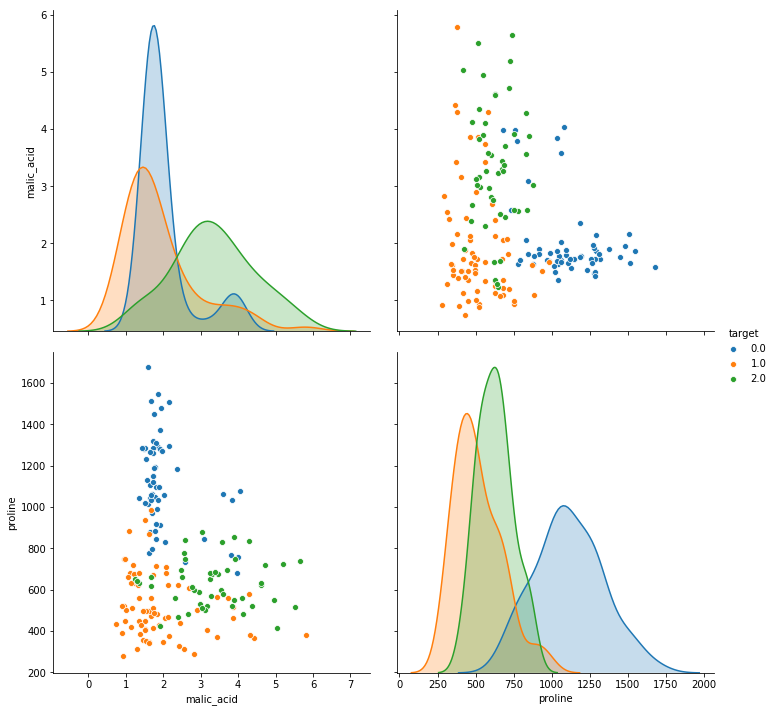

In [28]:
sns.pairplot(data=wine, vars=['malic_acid', 'proline'], hue='target', height=5)
plt.show()

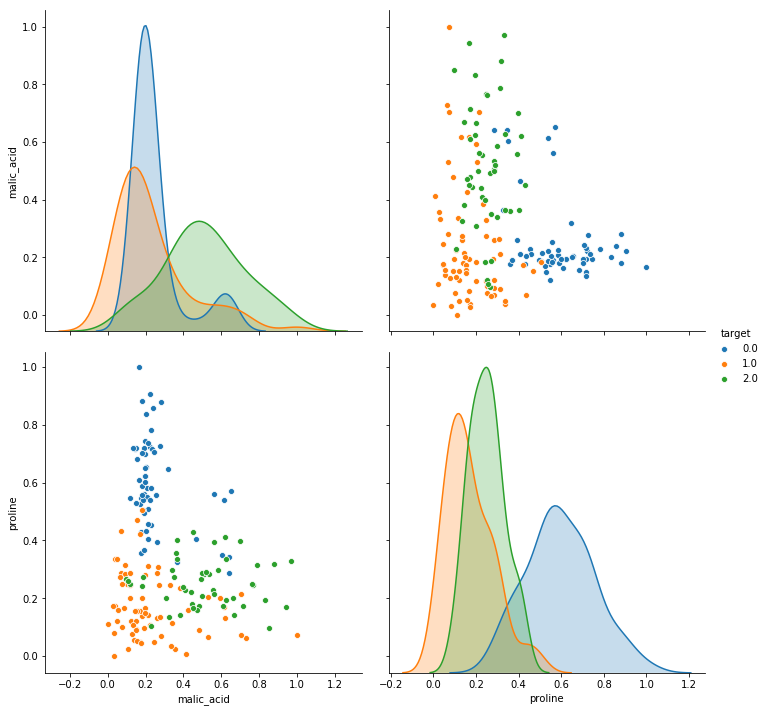

In [32]:
wine.malic_acid = norm_z_o[:,0]
wine.proline = norm_z_o[:,1]
sns.pairplot(data=wine, vars=['malic_acid', 'proline'], hue='target', height=5)

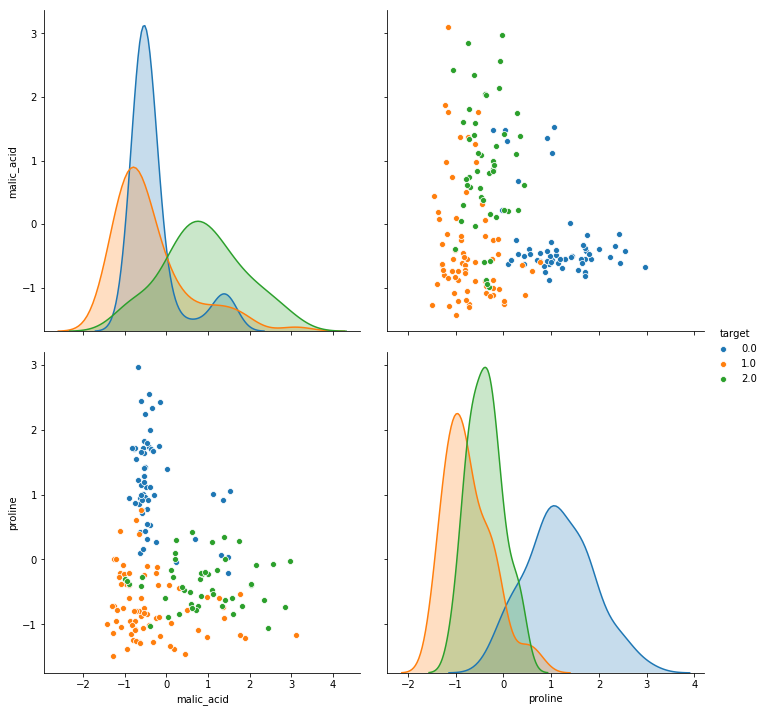

In [33]:
wine.malic_acid = norm_m0_v1[:,0]
wine.proline = norm_m0_v1[:,1]
sns.pairplot(data=wine, vars=['malic_acid', 'proline'], hue='target', height=5)

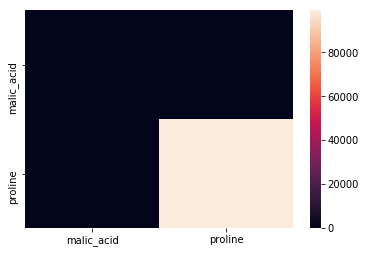

In [38]:
wine = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

cov = wine.iloc[:, [1, 12]].cov()

sns.heatmap(cov)
plt.show()

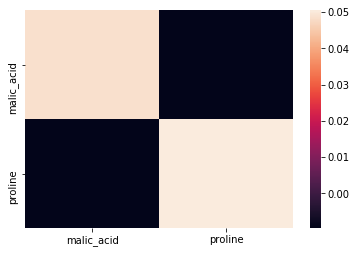

In [36]:
wine.malic_acid = norm_z_o[:,0]
wine.proline = norm_z_o[:,1]
cov = wine.iloc[:, [1, 12]].cov()

sns.heatmap(cov)
plt.show()

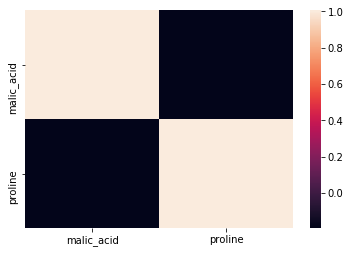

In [39]:
wine.malic_acid = norm_m0_v1[:,0]
wine.proline = norm_m0_v1[:,1]
cov = wine.iloc[:, [1, 12]].cov()

sns.heatmap(cov)
plt.show()

>### A partir dos gráficos plotados acima podemos concluir algumas coisas a partir das informações apresentadas. A dispersão dos dados continua a mesma após a normalização, o que faz todo o sentido dado que a alteração se dá em seus valores e não na distribuição. Os boxplots tiveram uma diferença muito boa, pois, agora é possível analisar as variáveis malic_acid e proline por meio destes, o que antes não era possível por conta das diferentes escalas das variáveis. Assim como o boxplot, a covariância também pôde ser analisada agora que os dados possuem uma escala parecida.